In [1]:
from enum import Enum

class Source(Enum):
    WORLDCLIM = 1
    GLOBE = 2

In [2]:
print("This will be it %s " % list(Source.__members__))

This will be it ['WORLDCLIM', 'GLOBE'] 


In [3]:
import rasterio
tmax_january = rasterio.open("/home/daniela/git/iSDM/data/tmax1/tmax1.bil")

In [4]:
tmax_january.bounds # it's part of the metadata (header) MinX MinY MaxX MaxY

BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003)

In [5]:
tmax_january.get_nodatavals() # also metadata

[-9999.0]

In [6]:
tmax_january.crs

{'init': 'epsg:4326'}

In [7]:
tmax_january.height # NROWS metadata

3600

In [8]:
tmax_january.lnglat()

(-1.9326762412674725e-12, 14.999999999999432)

In [9]:
tmax_january.res  # pixel size? XDIM YDIM metadata

(0.041666666666667, 0.041666666666667)

In [10]:
tmax_january.meta # awesome!

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
  0.041666666666667,
  0.0,
  90.00000000000003,
  0.0,
  -0.041666666666667),
 'width': 8640}

In [11]:
tmax_january.meta['transform']

(-180.00000000000335,
 0.041666666666667,
 0.0,
 90.00000000000003,
 0.0,
 -0.041666666666667)

In [12]:
tmax_january.sample(0.4)

<generator object sample_gen at 0x7fe5f06d2438>

In [13]:
npixels = tmax_january.width * tmax_january.height
for i in tmax_january.indexes:
    band = tmax_january.read(i)
    print(i, band[band!=tmax_january.nodata].min(), band.max(), band.sum()/npixels)

1 -489 419 -7087.92549322


In [14]:
npixels

31104000

In [15]:
for key in tmax_january.meta.keys():
    print(key,":",tmax_january.meta[key])

transform : (-180.00000000000335, 0.041666666666667, 0.0, 90.00000000000003, 0.0, -0.041666666666667)
count : 1
driver : EHdr
width : 8640
height : 3600
dtype : int16
nodata : -9999.0
crs : {'init': 'epsg:4326'}
affine : | 0.04, 0.00,-180.00|
| 0.00,-0.04, 90.00|
| 0.00, 0.00, 1.00|


In [16]:
print(tmax_january.read())

[[[-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  ..., 
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]
  [-9999 -9999 -9999 ..., -9999 -9999 -9999]]]


In [17]:
print(tmax_january.meta)

{'transform': (-180.00000000000335, 0.041666666666667, 0.0, 90.00000000000003, 0.0, -0.041666666666667), 'count': 1, 'driver': 'EHdr', 'width': 8640, 'height': 3600, 'dtype': 'int16', 'nodata': -9999.0, 'crs': {'init': 'epsg:4326'}, 'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003)}


In [18]:
import json
print(json.dumps(tmax_january.meta, indent=2))

{
  "transform": [
    -180.00000000000335,
    0.041666666666667,
    0.0,
    90.00000000000003,
    0.0,
    -0.041666666666667
  ],
  "count": 1,
  "driver": "EHdr",
  "width": 8640,
  "height": 3600,
  "dtype": "int16",
  "nodata": -9999.0,
  "crs": {
    "init": "epsg:4326"
  },
  "affine": [
    0.041666666666667,
    0.0,
    -180.00000000000335,
    0.0,
    -0.041666666666667,
    90.00000000000003,
    0.0,
    0.0,
    1.0
  ]
}


In [19]:
 import pprint

In [20]:
pp = pprint.PrettyPrinter(depth=6)

In [21]:
print(pp.pprint(tmax_january.meta))

{'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640}
None


In [3]:
temperature_max_january.load_data()

Loaded data from /home/daniela/git/iSDM/data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 


array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ..., 
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)

In [4]:
pp.pformat(tmax_january.meta)

NameError: name 'pp' is not defined

In [18]:
from rasterio.warp import calculate_default_transform, reproject, RESAMPLING

import numpy as np
destination = np.zeros(tmax_january.read(1).shape, np.uint8)
source=rasterio.band(tmax_january, 1)
band = tmax_january.read()

NameError: name 'tmax_january' is not defined

In [19]:
affine, width, height = calculate_default_transform(src_crs=tmax_january.crs, 
                            dst_crs=tmax_january.crs, 
                            width=tmax_january.width, 
                            height=tmax_january.height, 
                            left=tmax_january.bounds.left,
                            bottom=tmax_january.bounds.bottom,
                            right=tmax_january.bounds.right,
                            top=tmax_january.bounds.top,
                            resolution=5) # CHNGE RESOLUTION

NameError: name 'tmax_january' is not defined

In [122]:
destination = np.zeros((height,width), np.int16)

In [123]:
reproject(source=source, 
          destination=destination, src_transform=tmax_january.affine, 
          src_crs=tmax_january.crs, 
          dst_transform=affine, 
          dst_crs=tmax_january.crs, 
          resampling=RESAMPLING.nearest)

In [25]:
destination.shape

NameError: name 'destination' is not defined

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(destination, cmap="hot", interpolation="none")

NameError: name 'destination' is not defined

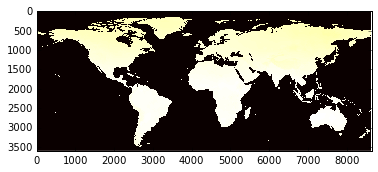

In [104]:
plt.imshow(band[0], cmap="hot", interpolation="none")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())

from iSDM.environment import ClimateLayer
temperature_max_january = ClimateLayer(file_path="/home/daniela/git/iSDM/data/tmax1/tmax1.bil")
temperature_max_january.load_data()

Loaded data from /home/daniela/git/iSDM/data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 


array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ..., 
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)

In [2]:
temperature_max_january.reproject(destination_file="./here.tif", resolution=10, dst_crs='EPSG:4326')

In [3]:
import rasterio
here = rasterio.open("./here.tif")

In [4]:
here.read().shape

(1, 16, 37)

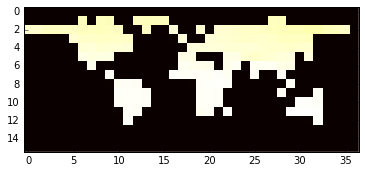

In [5]:
plt.imshow(here.read()[0], cmap="hot", interpolation="none")

In [6]:
original_data = temperature_max_january.load_data()

Loaded data from /home/daniela/git/iSDM/data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 


In [7]:
original_data.shape

(1, 3600, 8640)

In [8]:
here.nodata

-9999.0

In [9]:
here.meta

{'affine': Affine(10.0, 0.0, -180.000000000003,
       0.0, -10.0, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 16,
 'nodata': -9999.0,
 'transform': (-180.000000000003, 10.0, 0.0, 90.0, 0.0, -10.0),
 'width': 37}

In [10]:
here.bounds

BoundingBox(left=-180.000000000003, bottom=-70.0, right=189.999999999997, top=90.0)